In [11]:
%cd '/content/drive/My Drive/Colab Notebooks/stepik/m4. inference/w2. ab tests'
!ls

/content/drive/My Drive/Colab Notebooks/stepik/m4. inference/w2. ab tests
'2.3 diamonds.ipynb'			 ADHD.txt
'2.3 student t-tests.ipynb'		 banknotes.txt
'2.4 banknotes.ipynb'			 banner_click_stat.txt
'2.4 proportions diff test.ipynb'	 challenger.txt
'2.5 nonparametric - one sample.ipynb'	 diamonds.txt
'2.6 challenger.ipynb'			 mirror_mouses.txt
'2.6 nonparam independent.ipynb'	 seattle.txt
'2.6 nonparam paired.ipynb'		 weight.txt


# Непараметрические криетрии

  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

In [12]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [14]:
mouses_data = pd.read_csv('mirror_mouses.txt', header = None)
mouses_data.columns = ['proportion_of_time']

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mouses_data

In [ ]:
mouses_data.describe()

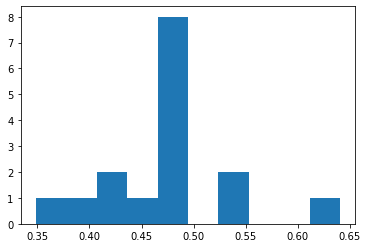

In [18]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

## Одновыборочные критерии

In [20]:
print(f'95%% confidence interval for the mean time: {zconfint(mouses_data)}')

95%% confidence interval for the mean time: (array([0.44291783]), array([0.50765996]))


### Критерий знаков

$H_0\colon$ медиана доли времени, проведенного в клетке с зеркалом, равна 0.5

$H_1\colon$ медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5

In [24]:
M, p = sign_test(mouses_data, 0.5)
print(f'M: {M},  p-value: {p}')

M: -5.0,  p-value: 0.021270751953125


In [21]:
help(sign_test)

Help on function sign_test in module statsmodels.stats.descriptivestats:

sign_test(samp, mu0=0)
    Signs test.
    
    Parameters
    ----------
    samp : array-like
        1d array. The sample for which you want to perform the signs
        test.
    mu0 : float
        See Notes for the definition of the sign test. mu0 is 0 by
        default, but it is common to set it to the median.
    
    Returns
    --------
    M, p-value
    
    Notes
    -----
    The signs test returns
    
    M = (N(+) - N(-))/2
    
    where N(+) is the number of values above `mu0`, N(-) is the number of
    values below.  Values equal to `mu0` are discarded.
    
    The p-value for M is calculated using the binomial distrubution
    and can be intrepreted the same as for a t-test. The test-statistic
    is distributed Binom(min(N(+), N(-)), n_trials, .5) where n_trials
    equals N(+) + N(-).
    
    See Also
    --------
    scipy.stats.wilcoxon



### Критерий знаковых рангов Вилкоксона

In [ ]:
m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

### Перестановочный критерий

$H_0\colon$ среднее равно 0.5

$H_1\colon$ среднее не равно 0.5

In [ ]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(map(lambda x: x - mean, sample))
    return t_stat

In [ ]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

In [ ]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = map(lambda x: x - mean, sample)
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

In [ ]:
pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins = 15)
pylab.show()

In [ ]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
print "p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5)

In [ ]:
print "p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5, 10000)